In [163]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [164]:
stay_df = pd.read_csv('stay.csv')

stay_df['status'] = 0
#0 for leaving
stay_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0


In [165]:
left_df = pd.read_csv('left.csv')
left_df['status'] = 1;
#1 means left
left_df.head()


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,1,0.38,0.53,2,157,3,0,0,sales,low,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,1


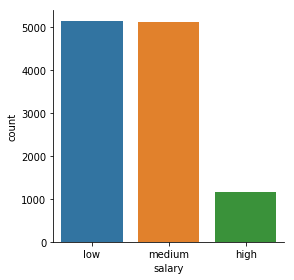

In [166]:
#To get the breakdown based on the salary
sns.factorplot('salary',data=stay_df,kind='count')

#So the lowest number who stayed are the high income group
##3 years seems to be the optimum age

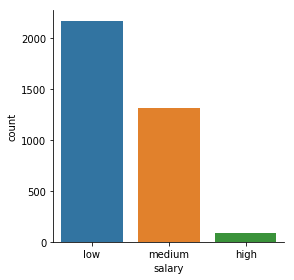

In [167]:
#To get the breakdown based on the salary
sns.factorplot('salary',data=left_df,kind='count')
#So the lowest number who stayed are the high income group
##3 years seems to be the optimum age

In [168]:
total_df = pd.concat([left_df,stay_df], ignore_index=True)
total_df.head()


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,1,0.38,0.53,2,157,3,0,0,sales,low,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,1


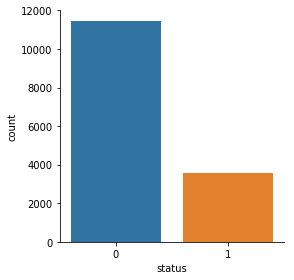

In [169]:
sns.factorplot('status',data=total_df,kind='count')

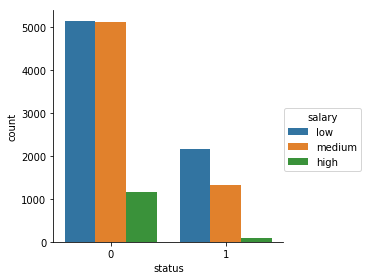

In [170]:
sns.factorplot('status',data=total_df,hue='salary',kind='count')

In [171]:
#Out of those who left, low income group was the highest

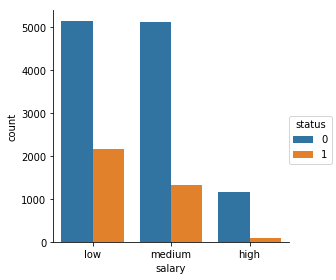

In [172]:
sns.factorplot('salary',data=total_df,hue='status',kind='count')

In [173]:
#########Very small proportion of high income group left. but a significant number of low income and to some extent medium income are okay too  

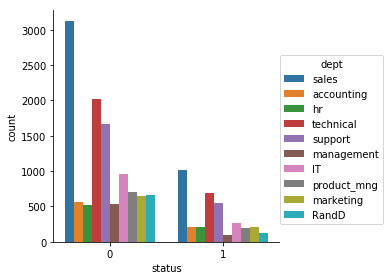

In [174]:
sns.factorplot('status',data=total_df,hue='dept',kind='count')


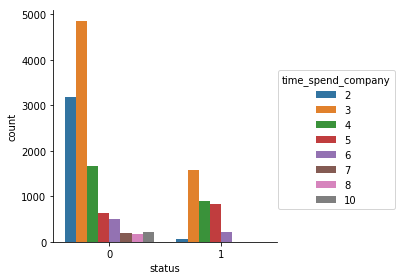

In [195]:
sns.factorplot('status',data=total_df,hue='time_spend_company',kind='count')


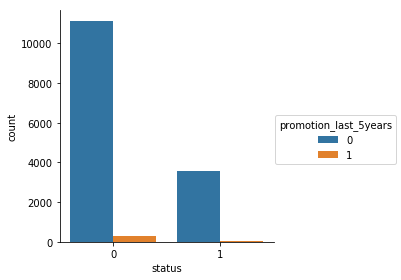

In [196]:
sns.factorplot('status',data=total_df,hue='promotion_last_5years',kind='count')
#### No influence on the promotions you recieved 

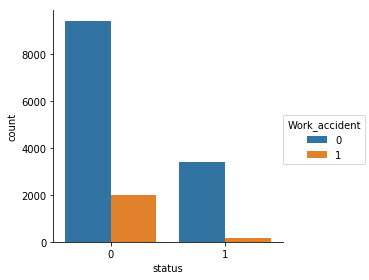

In [198]:
#The work accident factor too isn't too decisive
sns.factorplot('status',data=total_df,hue='Work_accident',kind='count')

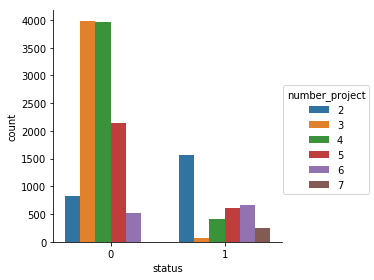

In [175]:
sns.factorplot('status',data=total_df,hue='number_project',kind='count')
### 2 means that you're out, 3 is most ideal, folllowed by 4, 7 also gives too much freedom


In [191]:
stay_mean = stay_df['satisfaction_level'].mean()
left_mean = left_df['satisfaction_level'].mean()
print 'The average level of satisfaction for the ones who left is ', left_mean, 'and ', stay_mean, 'for those who stayed.'

The average level of satisfaction for the ones who left is  0.440098011761 and  0.66680959048 for those who stayed.


In [192]:
stay_mean = stay_df['last_evaluation'].mean()
left_mean = left_df['last_evaluation'].mean()
print 'The average score after evaluation for the ones who left is ', left_mean, 'and ', stay_mean, 'for those who stayed.'

The average score after evaluation for the ones who left is  0.718112573509 and  0.71547339867 for those who stayed.


In [193]:
###No effect of the evaluation score on the dismissal

In [194]:
stay_mean = stay_df['average_montly_hours'].mean()
left_mean = left_df['average_montly_hours'].mean()
print 'The average hours for the ones who left is ', left_mean, 'and ', stay_mean, 'for those who stayed.'
##Hours have not much to do again

The average hours for the ones who left is  207.419210305 and  199.06020301 for those who stayed.


In [177]:
total_count = pd.value_counts(total_df['dept'],sort=False).tolist()
total_count

[2720L, 630L, 787L, 902L, 1227L, 858L, 2229L, 739L, 4140L, 767L]

In [178]:
percentage = []
stay_count = pd.value_counts(stay_df['dept'],sort=False).tolist()
stay_count

[2023L, 539L, 666L, 704L, 954L, 655L, 1674L, 524L, 3126L, 563L]

In [179]:
i=0
for i in range(10):

    value = 1 - (stay_count[i]*total_count[i])
    
    percentage.append(value)
    
percentage

[-5502559L,
 -339569L,
 -524141L,
 -635007L,
 -1170557L,
 -561989L,
 -3731345L,
 -387235L,
 -12941639L,
 -431820L]